# Analysis of Operational Settings and Sensor Data

## Overview
This notebook provides an analysis of the operational settings and sensor data from the dataset. We will explore how `operational_setting` changes over time for Unit 1 and visualize the correlations between different sensor measurements.

## Outcome

The outcome of this project is a predictive model that classifies the Remaining Useful Life (RUL) into three categories:

- **Class 0**: Indicates that the engine is in good condition and has more than 60% of its life remaining.
- **Class 1**: Indicates that the engine has between 40% to 60% of its life remaining.
- **Class 2**: Indicates that the engine has less than 40% of its life remaining, suggesting that it is nearing the end of its useful life and may require immediate maintenance.


## Load and Prepare Data

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cycle_ran_after = pd.read_csv('/CMaps/RUL_FD001.txt', sep=' ', header=None)
cycle_ran_after = cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)

# Load the training data
train_data = pd.read_csv('/CMaps/train_FD001.txt', delim_whitespace=True, header=None, names=[
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
    'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)])
train_data.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [72]:
train_data.describe()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.737553,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


## Correlation Heatmap of Sensor Measurements
We will plot a correlation heatmap to visualize the relationships between different sensor measurements.

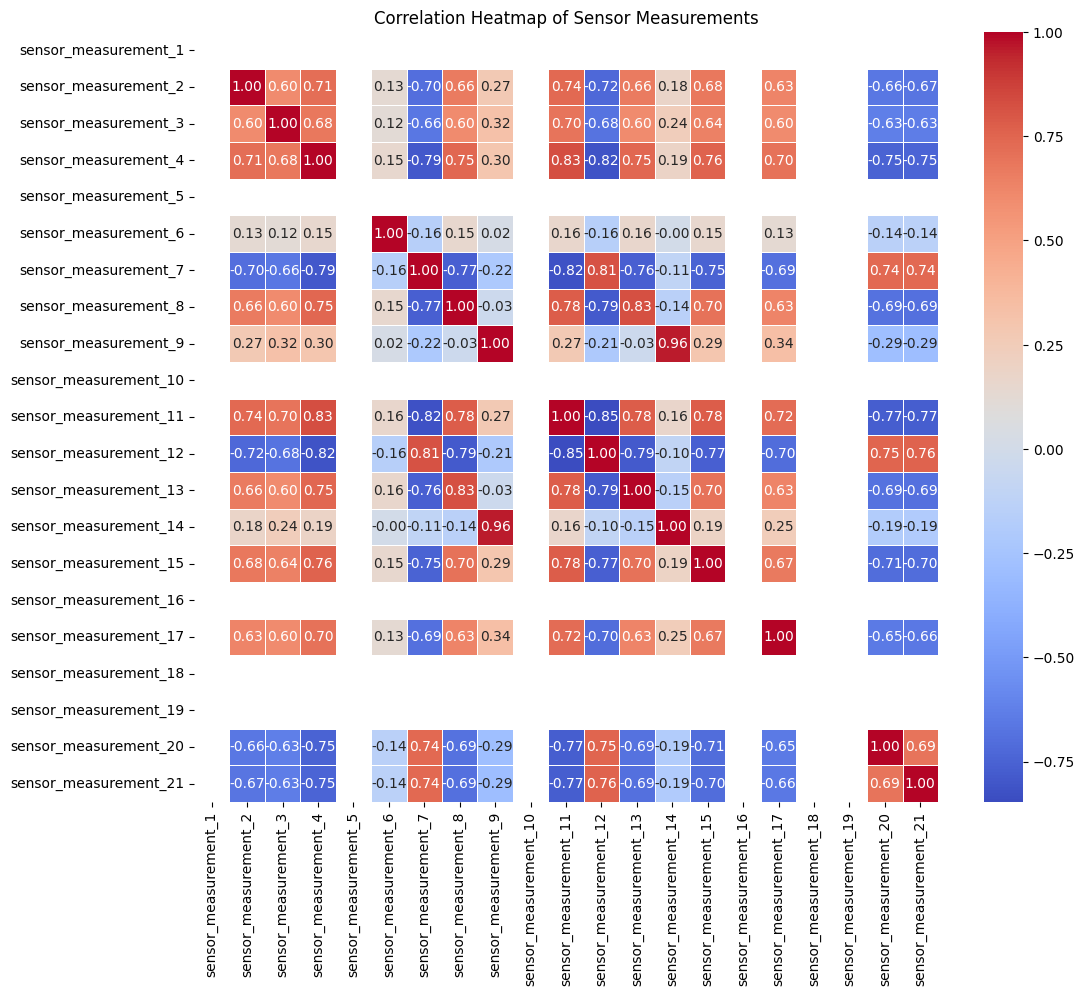

In [68]:
## Correlation Heatmap of Sensor Measurements
sensor_data = train_data.iloc[:, 5:]  
correlation_matrix = sensor_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Sensor Measurements')
plt.show()

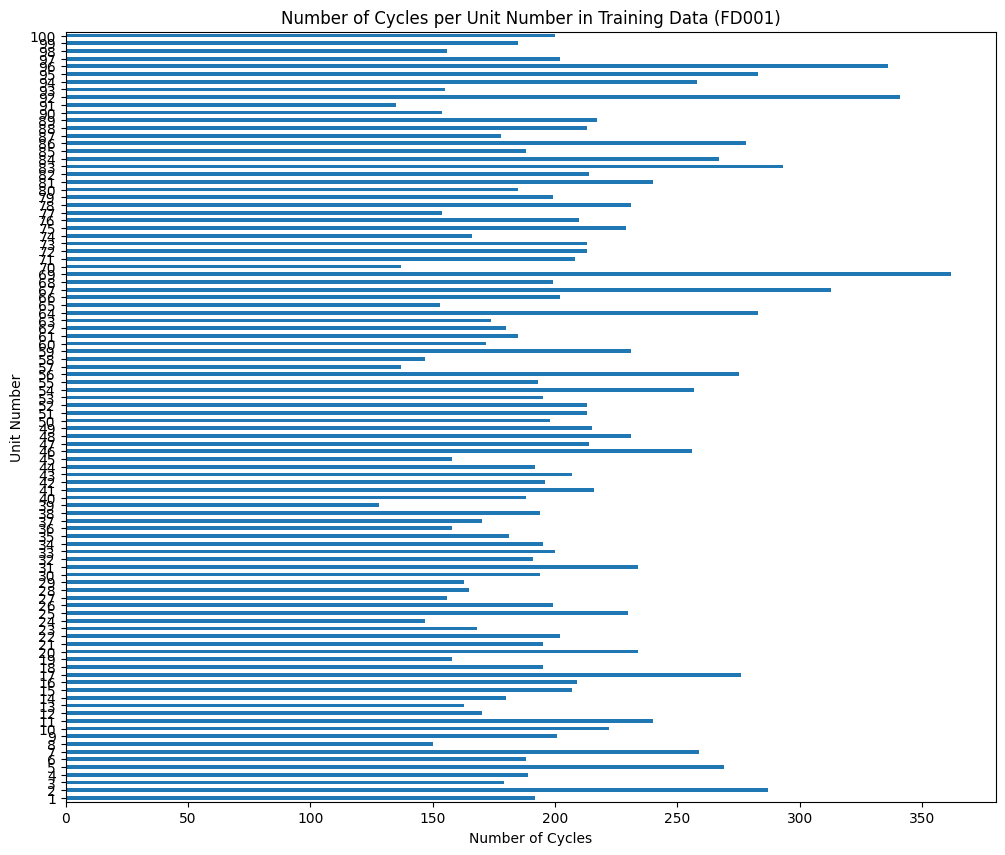

In [69]:
## Operational Setting 1 over Time for Unit 1
import matplotlib.pyplot as plt

# Count the number of cycles for each unit number
unit_counts = train_data['unit_number'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(12, 10))
unit_counts.plot(kind='barh')
plt.xlabel('Number of Cycles')
plt.ylabel('Unit Number')
plt.title('Number of Cycles per Unit Number in Training Data (FD001)')
# plt.grid(True)
plt.show()


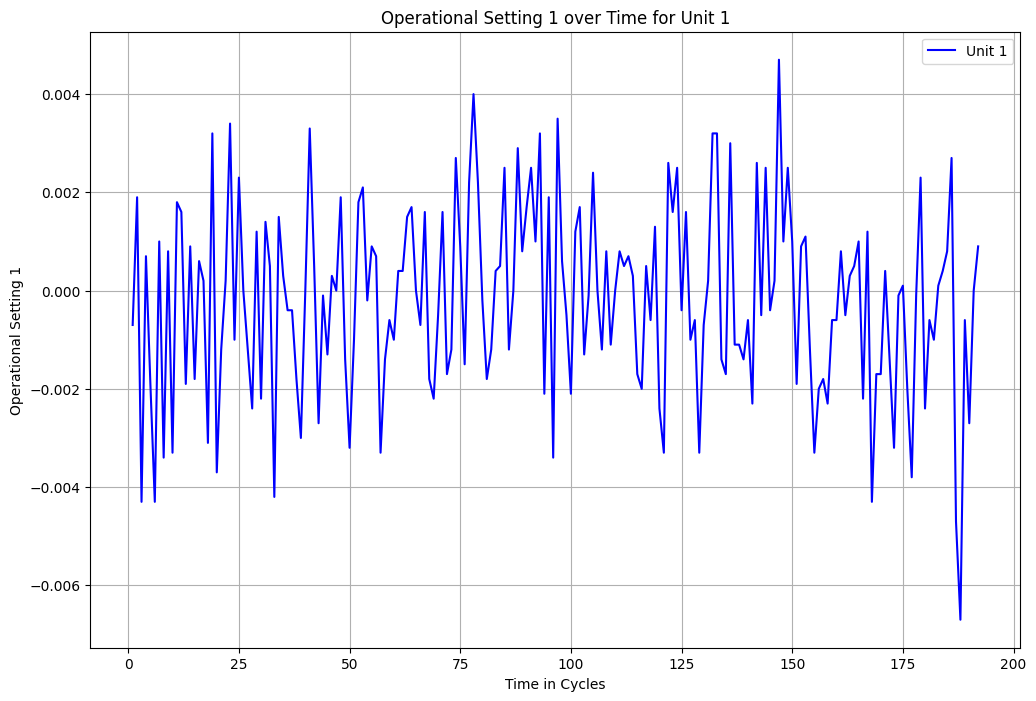

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data


# Filter data for unit 1 only
unit_1_data = train_data[train_data['unit_number'] == 1]

plt.figure(figsize=(12, 8))

# Plotting operational_setting_1 over time for unit 1
plt.plot(unit_1_data['time_in_cycles'], unit_1_data['operational_setting_1'], label='Unit 1', color='b')

plt.xlabel('Time in Cycles')
plt.ylabel('Operational Setting 1')
plt.title('Operational Setting 1 over Time for Unit 1')
plt.legend()
plt.grid(True)
plt.show()


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

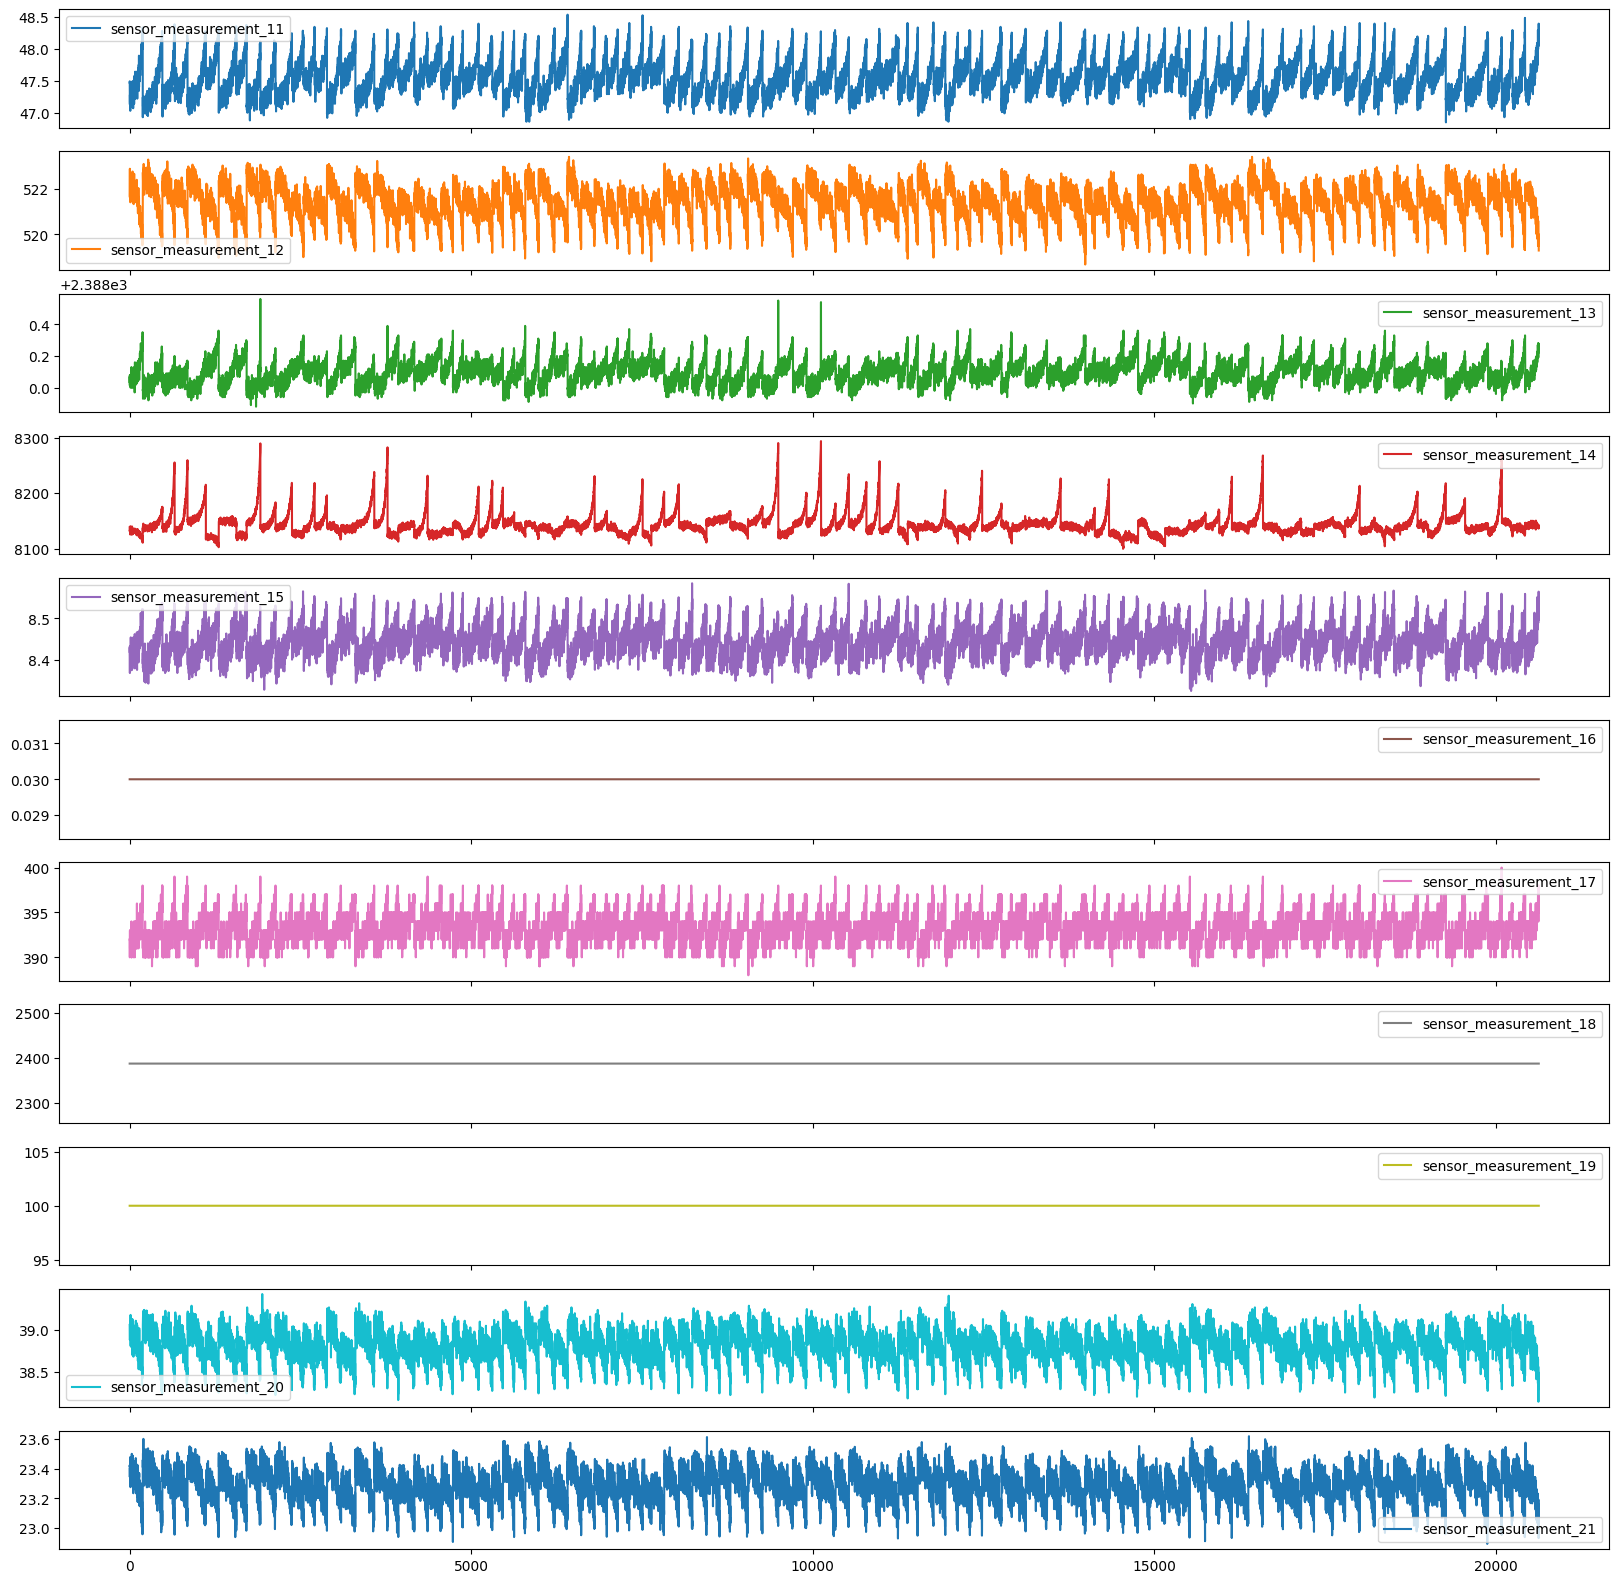

In [71]:
cols2 = [f'sensor_measurement_{i}' for i in range(11, 22)]
engine_id3_50cycleWindow2 = train_data[cols2]
engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

## tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import os
import joblib

# Load the training data
extracted_subdir = '/CMaps'


In [7]:
extracted_dir=extracted_subdir
train_data_path = os.path.join(extracted_dir, 'train_FD001.txt')
train_data = pd.read_csv(train_data_path, delim_whitespace=True, header=None, names=[
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
    'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)])
train_data.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [8]:
extracted_dir="archive/CMaps"
train_data_path = os.path.join(extracted_dir, 'train_FD002.txt')
train_data_2 = pd.read_csv(train_data_path, delim_whitespace=True, header=None, names=[
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
    'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)])
train_data.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [9]:
extracted_dir=extracted_subdir
train_data_path = os.path.join(extracted_dir, 'train_FD001.txt')
train_data_3 = pd.read_csv(train_data_path, delim_whitespace=True, header=None, names=[
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
    'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)])
train_data.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [15]:
cycle_ran_after_path = os.path.join(extracted_subdir, 'RUL_FD001.txt')
cycle_ran_after_1 = pd.read_csv(cycle_ran_after_path, sep=' ', header=None)

In [16]:
cycle_ran_after_path = os.path.join(extracted_subdir, 'RUL_FD002.txt')
cycle_ran_after_2 = pd.read_csv(cycle_ran_after_path, sep=' ', header=None)

In [17]:
cycle_ran_after_path = os.path.join(extracted_subdir, 'RUL_FD003.txt')
cycle_ran_after_3 = pd.read_csv(cycle_ran_after_path, sep=' ', header=None)

In [18]:
cycle_ran_after = pd.concat([cycle_ran_after_1,cycle_ran_after_2,cycle_ran_after_3])

In [19]:

cycle_ran_after = cycle_ran_after.drop([1], axis='columns')
cycle_ran_after = np.array(cycle_ran_after)

In [20]:
new_data=pd.concat([train_data,train_data_2,train_data_3])

In [21]:
given_no_of_cycles = new_data.groupby('unit_number')['time_in_cycles'].max().values
EOL = []
for i in range(len(train_data)):
    unit_number = train_data.iloc[i]['unit_number']
    EOL.append(given_no_of_cycles[int(unit_number) - 1] + cycle_ran_after[int(unit_number) - 1] - train_data.iloc[i]['time_in_cycles'])

EOL = np.array(EOL).reshape([len(EOL), 1])

In [22]:
train_data['EOL'] = EOL

# Create the LR feature
train_data['LR'] = train_data['time_in_cycles'] / train_data['EOL']
train_data.head()

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,EOL,LR
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,370.0,0.002703
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,369.0,0.005420
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,368.0,0.008152
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,367.0,0.010899
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,366.0,0.013661


In [23]:
train_data = train_data.drop(columns=['unit_number', 'EOL'])
# Generate labels based on LR values
labels = []
for i in range(len(train_data)):
    if train_data.iloc[i]["LR"] <= 0.6:
        labels.append(0)
    elif train_data.iloc[i]["LR"] <= 0.8:
        labels.append(1)
    else:
        labels.append(2)

# Add the labels to the DataFrame
train_data["labels"] = labels

In [24]:

train_data = train_data.drop(columns=['LR'])

# Ensure both train and test data have the same columns
columns = train_data.columns

In [25]:
# Impute missing values using the median for both train and test data
imputer = SimpleImputer(strategy='median')
train_data_imputed = imputer.fit_transform(train_data)

In [26]:
train_data_imputed = pd.DataFrame(train_data_imputed, columns=columns)
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data_imputed.drop(columns=['labels']))

In [27]:
def create_sequences(data, labels, time_steps=50):
    sequences = []
    for i in range(len(data) - time_steps):
        sequences.append((data[i:i+time_steps], labels[i+time_steps]))
    return sequences

time_steps = 50
train_sequences = create_sequences(train_data_scaled, train_data_imputed['labels'].values, time_steps)

In [29]:
X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])

In [52]:
from sklearn.model_selection import train_test_split
X_traini, X_test, y_traini, y_test = train_test_split(X_train, y_train, test_size = 0.30, random_state = 10)

In [ ]:
joblib.dump(scaler, '/CMaps/datat/scaler.save')


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
time_steps = X_train.shape[1]

# Building the LSTM model with increased regularization and dropout rate
time_steps = X_train.shape[1]

# Building the LSTM model with increased regularization and dropout rate
model = Sequential([
    LSTM(32, input_shape=(time_steps, X_train.shape[2]), return_sequences=True, kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.5),
    LSTM(16, kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Use a lower learning rate
optimizer = Adam(learning_rate=0.0005)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Implementing early stopping with adjusted patience
early_stopping = EarlyStopping(monitor='accuracy', patience=8, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
258/258 [==============================] - 19s 61ms/step - loss: 2.2732 - accuracy: 0.7329 - val_loss: 1.5224 - val_accuracy: 0.7634
Epoch 2/50
258/258 [==============================] - 14s 56ms/step - loss: 1.1118 - accuracy: 0.8053 - val_loss: 0.9046 - val_accuracy: 0.8011
Epoch 3/50
258/258 [==============================] - 13s 52ms/step - loss: 0.7625 - accuracy: 0.8168 - val_loss: 0.7644 - val_accuracy: 0.7923
Epoch 4/50
258/258 [==============================] - 15s 57ms/step - loss: 0.6312 - accuracy: 0.8211 - val_loss: 0.6919 - val_accuracy: 0.8071
Epoch 5/50
258/258 [==============================] - 15s 58ms/step - loss: 0.5733 - accuracy: 0.8213 - val_loss: 0.6448 - val_accuracy: 0.8020
Epoch 6/50
258/258 [==============================] - 15s 59ms/step - loss: 0.5374 - accuracy: 0.8228 - val_loss: 0.6271 - val_accuracy: 0.8006
Epoch 7/50
258/258 [==============================] - 15s 60ms/step - loss: 0.5088 - accuracy: 0.8285 - val_loss: 0.6200 - val_accuracy:

In [54]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

193/193 [==============================] - 2s 9ms/step


In [55]:
# Ensuring y_true and y_pred_labels are the same length
from sklearn.metrics import confusion_matrix, accuracy_score,mean_squared_error,mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
y_true=y_test
if len(y_true) > len(y_pred_labels):
    y_true = y_true[:len(y_pred_labels)]
elif len(y_true) < len(y_pred_labels):
    y_pred_labels = y_pred_labels[:len(y_true)]

# Evaluate the model
classification_rep = classification_report(y_true, y_pred_labels)
conf_matrix = confusion_matrix(y_true, y_pred_labels)

print("Classification Report:")
print(classification_rep)

# # Plot the confusion matrix
# Calculate additional metrics
mse = mean_squared_error(y_true, y_pred_labels)
mae = mean_absolute_error(y_true, y_pred_labels)
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Display a sample of the actual vs predicted values
sample_size = 10
print(f'Sample of actual vs predicted values (first {sample_size} samples):')
for i in range(sample_size):
    print(f'Actual: {y_true[i]}, Predicted: {y_pred_labels[i]}')


Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.91      3826
         1.0       0.37      0.36      0.36       636
         2.0       0.75      0.95      0.84      1713

    accuracy                           0.83      6175
   macro avg       0.69      0.72      0.70      6175
weighted avg       0.85      0.83      0.83      6175

193/193 [==============================] - 2s 9ms/step
Mean Squared Error: 0.28825910931174087
Mean Absolute Error: 0.20923076923076922
Root Mean Squared Error: 0.5368976711736985
Sample of actual vs predicted values (first 10 samples):
Actual: 1.0, Predicted: 1
Actual: 0.0, Predicted: 2
Actual: 2.0, Predicted: 2
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 2
Actual: 0.0, Predicted: 2
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0
Actual: 0.0, Predicted: 0


0.8302834008097166

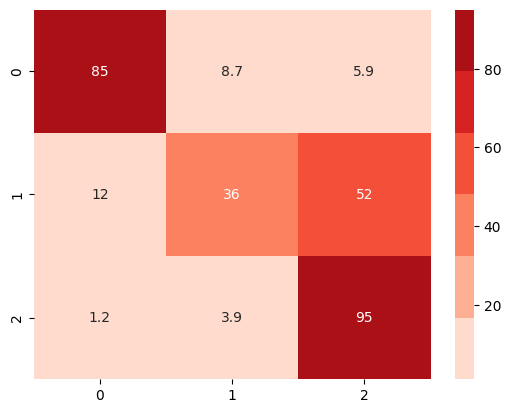

In [59]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_labels, normalize ='true')*100)
colormap = sns.color_palette("Reds")
sns.heatmap(cm, annot=True,cmap=colormap)
accuracy_score(y_test, y_pred_labels)


In [60]:
# Load new data for prediction
new_data_path = os.path.join(extracted_dir, 'test_FD001.txt')  # Change this to the path of your new data file
new_data = pd.read_csv(new_data_path, delim_whitespace=True, header=None, names=[
    'unit_number', 'time_in_cycles', 'operational_setting_1', 'operational_setting_2', 
    'operational_setting_3'] + [f'sensor_measurement_{i}' for i in range(1, 22)])

In [61]:
scaler = joblib.load("/CMaps/datat/scaler.save")
new_data = new_data.drop(columns=['unit_number'])
new_data['labels'] = np.nan
new_data_imputed = imputer.transform(new_data)
new_data_imputed = pd.DataFrame(new_data_imputed, columns=columns)
new_data_scaled = scaler.transform(new_data_imputed.drop(columns=['labels']))

In [62]:
new_sequences = create_sequences(new_data_scaled, np.zeros(len(new_data_scaled)), time_steps)


In [63]:
X_new = np.array([seq[0] for seq in new_sequences])
y_new_pred = model.predict(X_new)
y_new_pred_labels = np.argmax(y_new_pred, axis=1)
print("Predicted labels for new data:")
print(y_new_pred_labels,len(y_new_pred_labels))

1061/1061 [==============================] - 9s 8ms/step
Predicted labels for new data:
[0 0 0 ... 0 0 0] 33941
